## Installed Python packages (not all used)
List of the installed packages are available in the requierment.txt included in the project folder:
* numpy
* pandas
* pandas-datareader
* plotly
* python-dateutil
* requests
* urllib3
* Werkzeug
* pyjson
* jupyter
* jupyterlab
* scipy
* matplotlib
* lasio
* pylops
* pyodbc
* pysand
* scikit-learn
* seaborn
* segyio
* dtaidistance
* kneed
* statsmodels

## Summary


 
**Machine learning and prediction**<br>
Various methods has been tested here as well such as ANN , Svm , Decision Tree, Linear Regression, Ridge Regression, Autoreg. ANN , Svm , Decision Tree did not match with the data and the prediction weren’t relevant consequently. Linear Regression and Ridge Regression method results are partially matched with a few countries. At the end Autoreg is used to predict the New_cases and New_deaths for next 14 days.



data_covid_eu_selected = pd.read_csv('data_covid_eu_selected_v4.csv', header=0, index_col=1, 
    parse_dates=True, squeeze=True)

### Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.


### All the algorithms of machine learning devided to 3 parts:
    1- Supervised Learning: This algorithm consist of a target/outcome variable (or dependent variable) which is to be predicted from a given set of predictors (independent variables). Using these set of variables, we generate a function that maps inputs to desired outputs. The training process continues until the model achieves a desired level of accuracy on the training data. Examples of Supervised Learning: Regression, Decision Tree, Random Forest, KNN, Logistic Regression etc.
    2- Unsupervised Learning: In this algorithm, we do not have any target or outcome variable to predict / estimate. It is used for clustering population in different groups, which is widely used for segmenting customers in different groups for specific intervention. Examples of Unsupervised Learning: Apriori algorithm, K-means.
    3-Reinforcement Learning: Using this algorithm, the machine is trained to make specific decisions. It works this way: the machine is exposed to an environment where it trains itself continually using trial and error. This machine learns from past experience and tries to capture the best possible knowledge to make accurate business decisions. Example of Reinforcement Learning: Markov Decision Process

####    According to selected features, our dataset fits to first category and we apply some of that algorithms to dataset that will be seen below:

## LinearRegression: 
The objective of a linear regression model is to find a relationship between one or more features(independent variables) and a continuous target variable(dependent variable). When there is only feature it is called Uni-variate Linear Regression and if there are multiple features, it is called Multiple Linear Regression.

#### LinearRegression is applied on features to predict new deaths.

In [3]:
import pandas as pd
data_covid_eu_selected = pd.read_csv('data_covid_eu_selected_v4.csv', header=0, index_col=1, 
    parse_dates=True, squeeze=True)

Dropdown(description='Task:', index=7, options=('Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzeg…

Test RMSE: 1.349
Train RMSE: 0.314


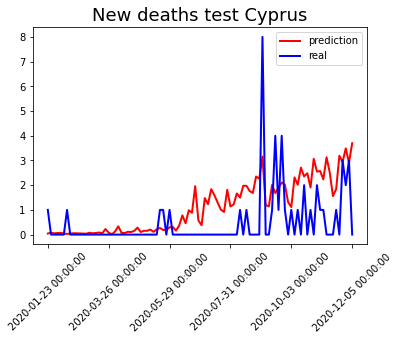

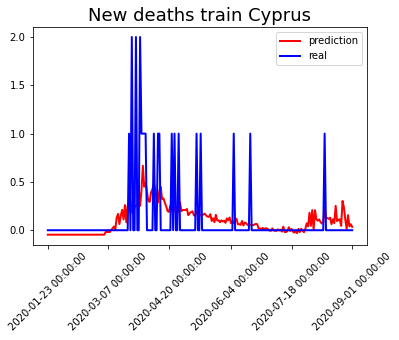

In [8]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.linear_model import LinearRegression

#sklearn modules for using later
import sklearn

def LinearRegressionPredictor(countryname):
    

    #if(countryname!='Europe'):
    data =data_covid_eu_selected[(data_covid_eu_selected['location']==countryname)].copy()
    #else:
        #data =data_covid_eu_selected.copy()

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    dataframe1 = data.select_dtypes(include=numerics)#.dropna('date')

    array = dataframe1.loc[:,dataframe1.columns!='new_deaths'].values
    X= array[:,:]
    trainx,testx=X[0:int(len(X)*.7),:],X[int(len(X)*.7):]
    
    y = dataframe1.loc[:,dataframe1.columns=='new_deaths'].values
    trainy,testy=y[0:int(len(y)*.7),:],y[int(len(y)*.7):]

    model= LinearRegression()
    
    model.fit(trainx, trainy)
    predictionstrain = model.predict(trainx)
    predictionstest = model.predict(testx)

    
    rmse = sqrt(mean_squared_error(testy, predictionstest))
    print('Test RMSE: %.3f' % rmse)
   
    
    plt.figure(figsize=(6,4))
    plt.plot(predictionstest,color='red',linewidth=2)
    plt.plot(testy,color='blue',linewidth=2)
    plt.legend(['prediction','real'])
    plt.title("New deaths test "+countryname, fontsize = 18)
    
    lenth=len(predictionstest)
    lenth2=len(predictionstrain)+lenth
    plt.xticks([0, int(lenth*0.2), int(lenth*0.4),int(lenth*0.6),int(lenth*0.8),lenth-1],
           [str(data.index[0]),str(data.index[int(lenth2*0.2)]),str(data.index[int(lenth2*0.4)]),str(data.index[int(lenth2*0.6)]),str(data.index[int(lenth2*0.8)]),str(data.index[lenth2-1])],rotation=45)
   
    plt.figure(figsize=(6,4))
    plt.plot(predictionstrain,color='red',linewidth=2)
    plt.plot(trainy,color='blue',linewidth=2)
    plt.legend(['prediction','real'])
    plt.title("New deaths train "+countryname, fontsize = 18)
    lenth=len(predictionstrain)
    plt.xticks([0, int(lenth*0.2), int(lenth*0.4),int(lenth*0.6),int(lenth*0.8),lenth-1],
           [str(data.index[0]),str(data.index[int(lenth*0.2)]),str(data.index[int(lenth*0.4)]),str(data.index[int(lenth*0.6)]),str(data.index[int(lenth*0.8)]),str(data.index[lenth])],rotation=45)
    
    rmse = sqrt(mean_squared_error(trainy, predictionstrain))
    print('Train RMSE: %.3f' % rmse)

from IPython.display import clear_output
from ipywidgets import interact, widgets
from IPython.display import display
import numpy as np

dropLinearDeaths = widgets.Dropdown(
    options=data_covid_eu_selected['location'].unique(),
    
    description='Task:',
)

def on_changedropLinearDeaths(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output()
        display(dropLinearDeaths)
        LinearRegressionPredictor(dropLinearDeaths.value)

dropLinearDeaths.observe(on_changedropLinearDeaths)
display(dropLinearDeaths)



#### LinearRegression is applied on features to predict new cases.

Dropdown(description='Task:', index=14, options=('Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herze…

Test RMSE: 918.960
Train RMSE: 53.166


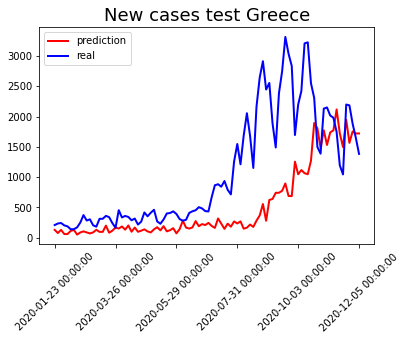

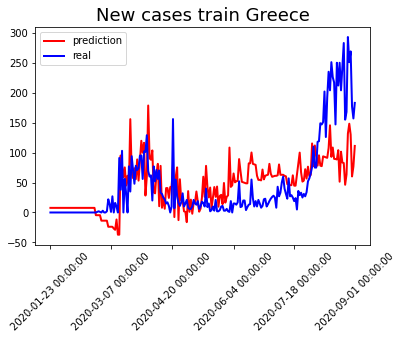

In [9]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.linear_model import LinearRegression

#sklearn modules for using later
import sklearn

def LinearRegressionPredictorNewCase(countryname):
    

    #if(countryname!='Europe'):
    data =data_covid_eu_selected[(data_covid_eu_selected['location']==countryname)].copy()
    #else:
        #data =data_covid_eu_selected.copy()

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    dataframe1 = data.select_dtypes(include=numerics)#.dropna('date')

    array = dataframe1.loc[:,dataframe1.columns!='new_cases'].values
    X= array[:,:]
    trainx,testx=X[0:int(len(X)*.7),:],X[int(len(X)*.7):]
    
    y = dataframe1.loc[:,dataframe1.columns=='new_cases'].values
    trainy,testy=y[0:int(len(y)*.7),:],y[int(len(y)*.7):]

    model= LinearRegression()
    
    model.fit(trainx, trainy)
    predictionstrain = model.predict(trainx)
    predictionstest = model.predict(testx)

    
    rmse = sqrt(mean_squared_error(testy, predictionstest))
    print('Test RMSE: %.3f' % rmse)
   
    
    plt.figure(figsize=(6,4))
    plt.plot(predictionstest,color='red',linewidth=2)
    plt.plot(testy,color='blue',linewidth=2)
    plt.legend(['prediction','real'])
    plt.title("New cases test "+countryname, fontsize = 18)
    
    lenth=len(predictionstest)
    lenth2=len(predictionstrain)+lenth
    plt.xticks([0, int(lenth*0.2), int(lenth*0.4),int(lenth*0.6),int(lenth*0.8),lenth-1],
           [str(data.index[0]),str(data.index[int(lenth2*0.2)]),str(data.index[int(lenth2*0.4)]),str(data.index[int(lenth2*0.6)]),str(data.index[int(lenth2*0.8)]),str(data.index[lenth2-1])],rotation=45)
   
    
    plt.figure(figsize=(6,4))
    plt.plot(predictionstrain,color='red',linewidth=2)
    plt.plot(trainy,color='blue',linewidth=2)
    plt.legend(['prediction','real'])
    plt.title("New cases train "+countryname, fontsize = 18)
    lenth=len(predictionstrain)
    plt.xticks([0, int(lenth*0.2), int(lenth*0.4),int(lenth*0.6),int(lenth*0.8),lenth-1],
           [str(data.index[0]),str(data.index[int(lenth*0.2)]),str(data.index[int(lenth*0.4)]),str(data.index[int(lenth*0.6)]),str(data.index[int(lenth*0.8)]),str(data.index[lenth])],rotation=45)
    
    rmse = sqrt(mean_squared_error(trainy, predictionstrain))
    print('Train RMSE: %.3f' % rmse)

from IPython.display import clear_output
from ipywidgets import interact, widgets
from IPython.display import display
import numpy as np
#cleaned_file_path='data_covid_eu_selected_v4.csv'
#data_covid_eu_selected= pd.read_csv(cleaned_file_path)
dropLinearCase = widgets.Dropdown(
    options=data_covid_eu_selected['location'].unique(),
    #value='Addition',
    description='Task:',
)

def on_changedropLinearCase(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output()
        display(dropLinearCase)
        LinearRegressionPredictorNewCase(dropLinearCase.value)

dropLinearCase.observe(on_changedropLinearCase)
display(dropLinearCase)



#### Ridge Regression: this is a technique for analyzing multiple regression data that suffer from multicollinearity. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors. It is hoped that the net effect will be to give estimates that are more reliable.

#### Ridge Regression is applied on features to predict new deaths.

Dropdown(description='Task:', index=12, options=('Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herze…

Test RMSE: 655.089
Train RMSE: 206.391


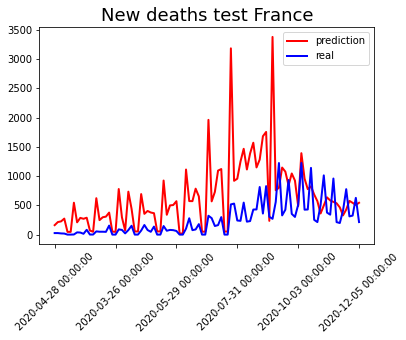

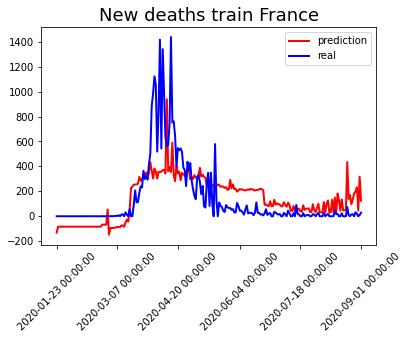

In [6]:
from sklearn.metrics import mean_squared_error

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge

#sklearn modules for using later
import sklearn

def RidgePredictorNewDeaths(countryname):
    

    #if(countryname!='Europe'):
    data =data_covid_eu_selected[(data_covid_eu_selected['location']==countryname)].copy()
    #else:
        #data =data_covid_eu_selected.copy()

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    dataframe1 = data.select_dtypes(include=numerics)#.dropna('date')

    array = dataframe1.loc[:,dataframe1.columns!='new_deaths'].values
    X= array[:,:]
    trainx,testx=X[0:int(len(X)*.7),:],X[int(len(X)*.7):]
    
    y = dataframe1.loc[:,dataframe1.columns=='new_deaths'].values
    trainy,testy=y[0:int(len(y)*.7),:],y[int(len(y)*.7):]

    model = Ridge(alpha=.2)
    
    model.fit(trainx, trainy)
    predictionstrain = model.predict(trainx)
    predictionstest = model.predict(testx)

    
    rmse = sqrt(mean_squared_error(testy, predictionstest))
    print('Test RMSE: %.3f' % rmse)
   
    
    plt.figure(figsize=(6,4))
    plt.plot(predictionstest,color='red',linewidth=2)
    plt.plot(testy,color='blue',linewidth=2)
    plt.legend(['prediction','real'])
    plt.title("New deaths test "+countryname, fontsize = 18)
    lenth=len(predictionstest)
    lenth2=len(predictionstrain)+lenth
    plt.xticks([0, int(lenth*0.2), int(lenth*0.4),int(lenth*0.6),int(lenth*0.8),lenth-1],
           [str(data.index[0]),str(data.index[int(lenth2*0.2)]),str(data.index[int(lenth2*0.4)]),str(data.index[int(lenth2*0.6)]),str(data.index[int(lenth2*0.8)]),str(data.index[lenth2-1])],rotation=45)
   
    
    
    plt.figure(figsize=(6,4))
    plt.plot(predictionstrain,color='red',linewidth=2)
    plt.plot(trainy,color='blue',linewidth=2)
    plt.legend(['prediction','real'])
    plt.title("New deaths train "+countryname, fontsize = 18)
    lenth=len(predictionstrain)
    plt.xticks([0, int(lenth*0.2), int(lenth*0.4),int(lenth*0.6),int(lenth*0.8),lenth-1],
           [str(data.index[0]),str(data.index[int(lenth*0.2)]),str(data.index[int(lenth*0.4)]),str(data.index[int(lenth*0.6)]),str(data.index[int(lenth*0.8)]),str(data.index[lenth])],rotation=45)
    
    rmse = sqrt(mean_squared_error(trainy, predictionstrain))
    print('Train RMSE: %.3f' % rmse)

from IPython.display import clear_output
from ipywidgets import interact, widgets
from IPython.display import display
import numpy as np
#cleaned_file_path='data_covid_eu_selected_v4.csv'
#data_covid_eu_selected= pd.read_csv(cleaned_file_path)
dropRidgeCase = widgets.Dropdown(
    options=data_covid_eu_selected['location'].unique(),
    #value='Addition',
    description='Task:',
)

def on_changedropLinearCase(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output()
        display(dropRidgeCase)
        RidgePredictorNewDeaths(dropRidgeCase.value)

dropRidgeCase.observe(on_changedropLinearCase)
display(dropRidgeCase)



#### Ridge Regression is applied to predict new case.

Dropdown(description='Task:', index=27, options=('Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herze…

Test RMSE: 325.587
Train RMSE: 52.974


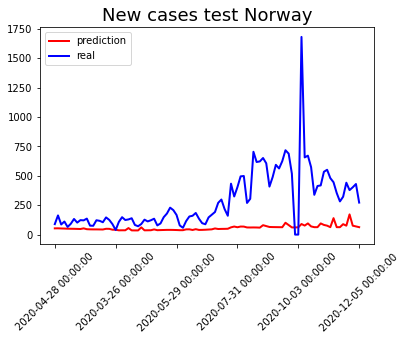

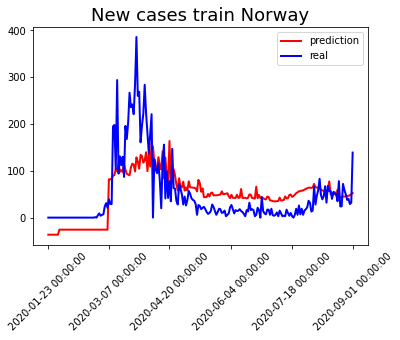

In [7]:
from sklearn.metrics import mean_squared_error

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge

#sklearn modules for using later
import sklearn

def RidgePredictorNewCase(countryname):
    

    data =data_covid_eu_selected[(data_covid_eu_selected['location']==countryname)].copy()

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    dataframe1 = data.select_dtypes(include=numerics)#.dropna('date')

    array = dataframe1.loc[:,dataframe1.columns!='new_cases'].values
    X= array[:,:]
    trainx,testx=X[0:int(len(X)*.7),:],X[int(len(X)*.7):]
    
    y = dataframe1.loc[:,dataframe1.columns=='new_cases'].values
    trainy,testy=y[0:int(len(y)*.7),:],y[int(len(y)*.7):]

    model = Ridge(alpha=.2)
    #model = PolynomialFeatures(degree = 4)

    # X_TRANSF = polynomial_features.fit_transform(X)
    #model.fit(X[int(len(X)*.2):int(len(X)*.8),:], y[int(len(y)*.2):int(len(y)*.8)])
    model.fit(trainx, trainy)
    predictionstrain = model.predict(trainx)
    predictionstest = model.predict(testx)

    
    rmse = sqrt(mean_squared_error(testy, predictionstest))
    print('Test RMSE: %.3f' % rmse)
   
    
    plt.figure(figsize=(6,4))
    plt.plot(predictionstest,color='red',linewidth=2)
    plt.plot(testy,color='blue',linewidth=2)
    plt.legend(['prediction','real'])
    plt.title("New cases test "+countryname, fontsize = 18)
    lenth=len(predictionstest)
    lenth2=len(predictionstrain)+lenth
    plt.xticks([0, int(lenth*0.2), int(lenth*0.4),int(lenth*0.6),int(lenth*0.8),lenth-1],
           [str(data.index[0]),str(data.index[int(lenth2*0.2)]),str(data.index[int(lenth2*0.4)]),str(data.index[int(lenth2*0.6)]),str(data.index[int(lenth2*0.8)]),str(data.index[lenth2-1])],rotation=45)
   
    
    
    plt.figure(figsize=(6,4))
    plt.plot(predictionstrain,color='red',linewidth=2)
    plt.plot(trainy,color='blue',linewidth=2)
    plt.legend(['prediction','real'])
    plt.title("New cases train "+countryname, fontsize = 18)
    lenth=len(predictionstrain)
    plt.xticks([0, int(lenth*0.2), int(lenth*0.4),int(lenth*0.6),int(lenth*0.8),lenth-1],
           [str(data.index[0]),str(data.index[int(lenth*0.2)]),str(data.index[int(lenth*0.4)]),str(data.index[int(lenth*0.6)]),str(data.index[int(lenth*0.8)]),str(data.index[lenth])],rotation=45)
    
    rmse = sqrt(mean_squared_error(trainy, predictionstrain))
    print('Train RMSE: %.3f' % rmse)

from IPython.display import clear_output
from ipywidgets import interact, widgets
from IPython.display import display
import numpy as np

dropRidgeCase = widgets.Dropdown(
    options=data_covid_eu_selected['location'].unique(),
    #value='Addition',
    description='Task:',
)

def on_changedropLinearCase(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output()
        display(dropRidgeCase)
        RidgePredictorNewCase(dropRidgeCase.value)

dropRidgeCase.observe(on_changedropLinearCase)
display(dropRidgeCase)



##### Autoreg: forcasting model for prediction time series .
In this case, we can arbitrarily select an autoregression model(AR) on dataset, for the next 14 days.

### AutoReg is applied to predict new deaths.

Dropdown(description='Task:', index=13, options=('Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herze…

e:\users\mehdi\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
e:\users\mehdi\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
e:\users\mehdi\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


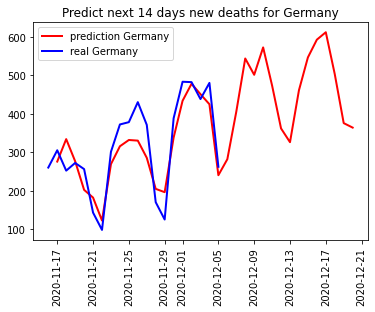

In [12]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
import numpy
# contrived dataset
def predictFutureِDeath(countryname):
    data_covid_eu_selected = pd.read_csv('data_covid_eu_selected_v4.csv', header=0, index_col=1, 
    parse_dates=True, squeeze=True)
    data =data_covid_eu_selected[(data_covid_eu_selected['location']==countryname)]['new_deaths'].copy()
    
    # fit model
    model = AutoReg(data, lags=30)
    model_fit = model.fit()
    
    yhat = model_fit.predict(0, len(data)+14)
   
    plt.xticks(rotation=90)
    
    plt.plot(yhat[len(yhat)-34:],color='red',linewidth=2)
    plt.plot(data[len(data)-20:],color='blue',linewidth=2)
    plt.legend(['prediction '+countryname,'real '+countryname])
    plt.title('Predict next 14 days new deaths for '+countryname)
    
    
    
droAutoregDeath = widgets.Dropdown(
    options=data_covid_eu_selected['location'].unique(),
    #value='Addition',
    description='Task:',
)

from ipywidgets import interact, widgets
from IPython.display import display
def on_changedroAutoregDeath(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output()
        display(droAutoregDeath)
        predictFutureِDeath(droAutoregDeath.value)

droAutoregDeath.observe(on_changedroAutoregDeath)
display(droAutoregDeath)

### AutoReg is applied to predict new cases.

Dropdown(description='Task:', index=16, options=('Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herze…

e:\users\mehdi\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
e:\users\mehdi\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
e:\users\mehdi\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


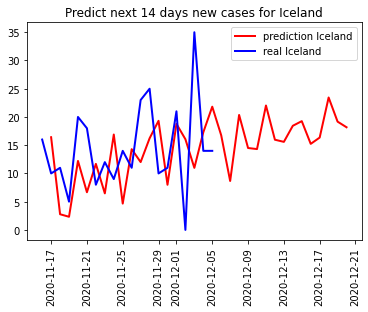

In [10]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
import numpy
# contrived dataset
def predictFutureِCase(countryname):
    
    data =data_covid_eu_selected[(data_covid_eu_selected['location']==countryname)]['new_cases'].copy()
    
    # fit model
    model = AutoReg(data, lags=30)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.predict(0, len(data)+14)
    
    plt.xticks(rotation=90)
    
    plt.plot(yhat[len(yhat)-34:],color='red',linewidth=2)
    plt.plot(data[len(data)-20:],color='blue',linewidth=2)
    plt.legend(['prediction '+countryname,'real '+countryname])
    plt.title('Predict next 14 days new cases for '+countryname)
    
    
    
from ipywidgets import interact, widgets
from IPython.display import display
droAutoregCase = widgets.Dropdown(
    options=data_covid_eu_selected['location'].unique(),
    #value='Addition',
    description='Task:',
)

def on_changedroAutoregCase(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output()
        display(droAutoregCase)
        predictFutureِCase(droAutoregCase.value)

droAutoregCase.observe(on_changedroAutoregCase)
display(droAutoregCase)

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.linear_model import LinearRegression
from pandas import read_csv
from sklearn.tree import DecisionTreeClassifier

#sklearn modules for using later
import sklearn

def DecisionTreeClassifierPredictor(countryname):
    data_covid = read_csv('data_covid_eu_selected_v4.csv', header=0, index_col=1, 
    parse_dates=True, squeeze=True)

    if(countryname!='Europe'):
        data =data_covid[(data_covid['location']==countryname)].copy()
    else:
        data =data_covid.copy()

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    dataframe1 = data.select_dtypes(include=numerics)#.dropna('date')

    array = dataframe1.loc[:,dataframe1.columns!='new_deaths'].values
    X= array[:,:]
    trainx,testx=X[int(len(X)*.2):int(len(X)*.8),:],X[int(len(X)*.8):]
    
    y = dataframe1.loc[:,dataframe1.columns=='new_deaths'].values
    trainy,testy=y[int(len(y)*.2):int(len(y)*.8),:],y[int(len(y)*.8):]

    model= DecisionTreeClassifier()
    model.fit(trainx, trainy)
    predictionstrain = model.predict(trainx)
    predictionstest = model.predict(testx)
    

    from sklearn.metrics import mean_squared_error
    
    rmse = sqrt(mean_squared_error(testy, predictionstest))
    print('Test RMSE: %.3f' % rmse)
    
    
    plt.figure(figsize=(6,4))
    plt.plot(predictionstest,color='red',linewidth=2)
    plt.plot(y[int(len(y)*.8)+1:],color='blue',linewidth=2)
    plt.legend(['prediction','real'])
    plt.title("Test "+countryname, fontsize = 18)
    
    lenth=len(predictionstest)
    plt.xticks([0, int(lenth*0.2), int(lenth*0.4),int(lenth*0.6),int(lenth*0.8),lenth-1],
           [str(data.index[0]),str(data.index[int(lenth*0.2)]),str(data.index[int(lenth*0.4)]),str(data.index[int(lenth*0.6)]),str(data.index[int(lenth*0.8)]),str(data.index[lenth])],rotation=45)
           #    ["Jan\n2009", "Feb\n2009", "Mar\n2009", "Apr\n2009", "May\n2009"])

    #plt.title("Test "+countryname, fontsize = 18)
    #plt.xticks(           ["Jan\n2009", "Feb\n2009", "Mar\n2009", "Apr\n2009", "May\n2009"])
    
    plt.figure(figsize=(6,4))
    plt.plot(predictionstrain,color='red',linewidth=3)
    plt.plot(y[int(len(y)*.2):int(len(y)*.8)],color='blue',linewidth=2)
    plt.legend(['prediction','real'])
    plt.title("Train "+countryname, fontsize = 18)
    lenth=len(predictionstrain)
    plt.xticks([0, int(lenth*0.2), int(lenth*0.4),int(lenth*0.6),int(lenth*0.8),lenth-1],
           [str(data.index[0]),str(data.index[int(lenth*0.2)]),str(data.index[int(lenth*0.4)]),str(data.index[int(lenth*0.6)]),str(data.index[int(lenth*0.8)]),str(data.index[lenth])],rotation=45)
    
    rmse = sqrt(mean_squared_error(trainy, predictionstrain))
    print('Train RMSE: %.3f' % rmse)

from IPython.display import clear_output
from ipywidgets import interact, widgets
from IPython.display import display
import numpy as np
cleaned_file_path='./data_covid_eu_selected_v4.csv'
data_covid_eu= pd.read_csv(cleaned_file_path)
w1 = widgets.Dropdown(
    options=np.append(data_covid_eu['location'].unique(),'Europe'),
    #value='Addition',
    description='Task:',
)

def on_changew1(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output()
        display(w1)
        DecisionTreeClassifierPredictor(w1.value)

w1.observe(on_changew1)
display(w1)



Dropdown(description='Task:', options=('Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', '…

In [143]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
#X, y = make_classification(n_samples=100, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)
#clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)




import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier

#sklearn modules for using later
import sklearn

def ANNClassifierPredictor(countryname):
    data_covid = read_csv('data_covid_eu_selected_v4.csv', header=0, index_col=1, 
    parse_dates=True, squeeze=True)

    if(countryname!='Europe'):
        data =data_covid[(data_covid['location']==countryname)].copy()
    else:
        data =data_covid.copy()

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    dataframe1 = data.select_dtypes(include=numerics)#.dropna('date')

    array = dataframe1.loc[:,dataframe1.columns!='new_deaths'].values
    X= array[:,:]
    trainx,testx=X[int(len(X)*.2):int(len(X)*.8),:],X[int(len(X)*.8):]
    
    y = dataframe1.loc[:,dataframe1.columns=='new_deaths'].values
    trainy,testy=y[int(len(y)*.2):int(len(y)*.8),:],y[int(len(y)*.8):]

    model= MLPClassifier(random_state=50, max_iter=300).fit(trainx, trainy)
    model.fit(trainx, trainy)
    predictionstrain = model.predict(trainx)
    predictionstest = model.predict(testx)
    

    from sklearn.metrics import mean_squared_error
    
    rmse = sqrt(mean_squared_error(testy, predictionstest))
    print('Test RMSE: %.3f' % rmse)
    
    
    plt.figure(figsize=(6,4))
    plt.plot(predictionstest,color='red',linewidth=2)
    plt.plot(y[int(len(y)*.8)+1:],color='blue',linewidth=2)
    plt.legend(['prediction','real'])
    plt.title("Test "+countryname, fontsize = 18)
    
    lenth=len(predictionstest)
    plt.xticks([0, int(lenth*0.2), int(lenth*0.4),int(lenth*0.6),int(lenth*0.8),lenth-1],
           [str(data.index[0]),str(data.index[int(lenth*0.2)]),str(data.index[int(lenth*0.4)]),str(data.index[int(lenth*0.6)]),str(data.index[int(lenth*0.8)]),str(data.index[lenth])],rotation=45)
           #    ["Jan\n2009", "Feb\n2009", "Mar\n2009", "Apr\n2009", "May\n2009"])

    #plt.title("Test "+countryname, fontsize = 18)
    #plt.xticks(           ["Jan\n2009", "Feb\n2009", "Mar\n2009", "Apr\n2009", "May\n2009"])
    
    plt.figure(figsize=(6,4))
    plt.plot(predictionstrain,color='red',linewidth=3)
    plt.plot(y[int(len(y)*.2):int(len(y)*.8)],color='blue',linewidth=2)
    plt.legend(['prediction','real'])
    plt.title("Train "+countryname, fontsize = 18)
    lenth=len(predictionstrain)
    plt.xticks([0, int(lenth*0.2), int(lenth*0.4),int(lenth*0.6),int(lenth*0.8),lenth-1],
           [str(data.index[0]),str(data.index[int(lenth*0.2)]),str(data.index[int(lenth*0.4)]),str(data.index[int(lenth*0.6)]),str(data.index[int(lenth*0.8)]),str(data.index[lenth])],rotation=45)
    
    rmse = sqrt(mean_squared_error(trainy, predictionstrain))
    print('Train RMSE: %.3f' % rmse)

from IPython.display import clear_output
from ipywidgets import interact, widgets
from IPython.display import display
import numpy as np
cleaned_file_path='./data_covid_eu_selected_v4.csv'
data_covid_eu= pd.read_csv(cleaned_file_path)
w2 = widgets.Dropdown(
    options=np.append(data_covid_eu['location'].unique(),'Europe'),
    #value='Addition',
    description='Task:',
)

def on_changew2(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output()
        display(w2)
        ANNClassifierPredictor(w2.value)

w2.observe(on_changew2)
display(w2)



Dropdown(description='Task:', options=('Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', '…

In [144]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC


from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
#X, y = make_classification(n_samples=100, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)
#clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)




import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier

#sklearn modules for using later
import sklearn

def ANNClassifierPredictor(countryname):
    data_covid = read_csv('data_covid_eu_selected_v4.csv', header=0, index_col=1, 
    parse_dates=True, squeeze=True)

    if(countryname!='Europe'):
        data =data_covid[(data_covid['location']==countryname)].copy()
    else:
        data =data_covid.copy()

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    dataframe1 = data.select_dtypes(include=numerics)#.dropna('date')

    array = dataframe1.loc[:,dataframe1.columns!='new_deaths'].values
    X= array[:,:]
    trainx,testx=X[int(len(X)*.2):int(len(X)*.8),:],X[int(len(X)*.8):]
    
    y = dataframe1.loc[:,dataframe1.columns=='new_deaths'].values
    trainy,testy=y[int(len(y)*.2):int(len(y)*.8),:],y[int(len(y)*.8):]

    model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    model.fit(trainx, trainy)
    #Pipeline(steps=[('standardscaler', StandardScaler()),
                #('svc', SVC(gamma='auto'))])
    
    predictionstrain = model.predict(trainx)
    predictionstest = model.predict(testx)
    

    from sklearn.metrics import mean_squared_error
    
    rmse = sqrt(mean_squared_error(testy, predictionstest))
    print('Test RMSE: %.3f' % rmse)
    
    
    plt.figure(figsize=(6,4))
    plt.plot(predictionstest,color='red',linewidth=2)
    plt.plot(y[int(len(y)*.8)+1:],color='blue',linewidth=2)
    plt.legend(['prediction','real'])
    plt.title("Test "+countryname, fontsize = 18)
    
    lenth=len(predictionstest)
    plt.xticks([0, int(lenth*0.2), int(lenth*0.4),int(lenth*0.6),int(lenth*0.8),lenth-1],
           [str(data.index[0]),str(data.index[int(lenth*0.2)]),str(data.index[int(lenth*0.4)]),str(data.index[int(lenth*0.6)]),str(data.index[int(lenth*0.8)]),str(data.index[lenth])],rotation=45)
           #    ["Jan\n2009", "Feb\n2009", "Mar\n2009", "Apr\n2009", "May\n2009"])

    #plt.title("Test "+countryname, fontsize = 18)
    #plt.xticks(           ["Jan\n2009", "Feb\n2009", "Mar\n2009", "Apr\n2009", "May\n2009"])
    
    plt.figure(figsize=(6,4))
    plt.plot(predictionstrain,color='red',linewidth=3)
    plt.plot(y[int(len(y)*.2):int(len(y)*.8)],color='blue',linewidth=2)
    plt.legend(['prediction','real'])
    plt.title("Train "+countryname, fontsize = 18)
    lenth=len(predictionstrain)
    plt.xticks([0, int(lenth*0.2), int(lenth*0.4),int(lenth*0.6),int(lenth*0.8),lenth-1],
           [str(data.index[0]),str(data.index[int(lenth*0.2)]),str(data.index[int(lenth*0.4)]),str(data.index[int(lenth*0.6)]),str(data.index[int(lenth*0.8)]),str(data.index[lenth])],rotation=45)
    
    rmse = sqrt(mean_squared_error(trainy, predictionstrain))
    print('Train RMSE: %.3f' % rmse)

from IPython.display import clear_output
from ipywidgets import interact, widgets
from IPython.display import display
import numpy as np
cleaned_file_path='./data_covid_eu_selected_v4.csv'
data_covid_eu= pd.read_csv(cleaned_file_path)
w2 = widgets.Dropdown(
    options=np.append(data_covid_eu['location'].unique(),'Europe'),
    #value='Addition',
    description='Task:',
)

def on_changew2(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output()
        display(w2)
        ANNClassifierPredictor(w2.value)

w2.observe(on_changew2)
display(w2)



Dropdown(description='Task:', options=('Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', '…